In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
# 
fnCSVResTanh='results-all-in-one-Tanh.csv'
fnCSVResreLU='results-all-in-one-ReLU.csv'

In [3]:
dataTanh=pd.read_csv(fnCSVResTanh)
dataReLU=pd.read_csv(fnCSVResreLU)

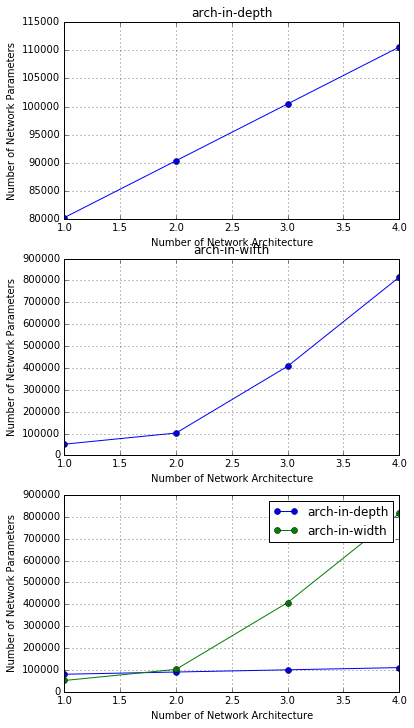

In [4]:
datay1=dataReLU[ (dataReLU['archType']==1) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numP']
datay2=dataReLU[ (dataReLU['archType']==2) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numP']
datax=range(1,len(datay1)+1)

plt.figure(figsize=(6,12))
plt.subplot(3,1,1)
plt.plot(datax,datay1,'o-')
plt.grid(True)
plt.xlabel('Number of Network Architecture')
plt.ylabel('Number of Network Parameters')
plt.title('arch-in-depth')
#
plt.subplot(3,1,2)
plt.plot(datax,datay2,'o-')
plt.grid(True)
plt.xlabel('Number of Network Architecture')
plt.ylabel('Number of Network Parameters')
plt.title('arch-in-wifth')
#
plt.subplot(3,1,3)
plt.hold(True)
plt.plot(datax,datay1,'o-')
plt.plot(datax,datay2,'o-')
plt.hold(False)
plt.grid(True)
plt.xlabel('Number of Network Architecture')
plt.ylabel('Number of Network Parameters')
plt.legend(['arch-in-depth', 'arch-in-width'])
plt.show()

In [5]:
dataReLU_InDepth=dataReLU[dataReLU['archType']==1]
dataTanh_InDepth=dataTanh[dataTanh['archType']==1]
dataReLU_InWidth=dataReLU[dataReLU['archType']==2]
dataTanh_InWidth=dataTanh[dataTanh['archType']==2]
#
arrNumP_InDepth=dataReLU[ (dataReLU['archType']==1) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numP']
arrNumP_InWidth=dataReLU[ (dataReLU['archType']==2) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numP']
#
arrNumN_InWidth=dataReLU[ (dataReLU['archType']==2) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numN']
arrNumEpoch=dataReLU[ (dataReLU['archType']==1) & (dataReLU['Model']=='Keras') & (dataReLU['numL']==1)]['numEpoch']
#
arrFrmNames=dataTanh['Model'].unique()

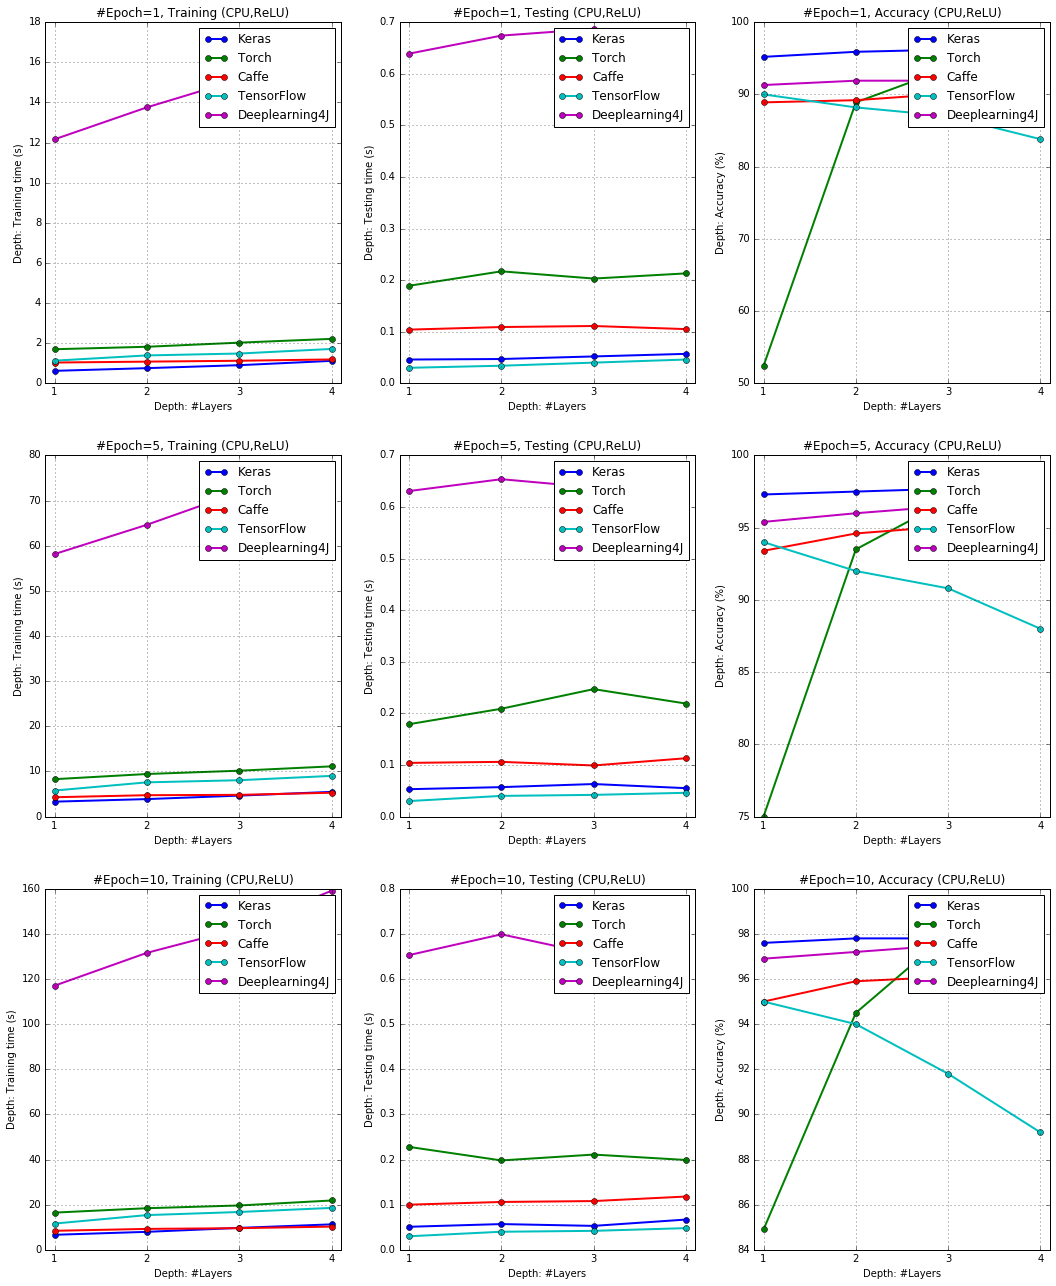

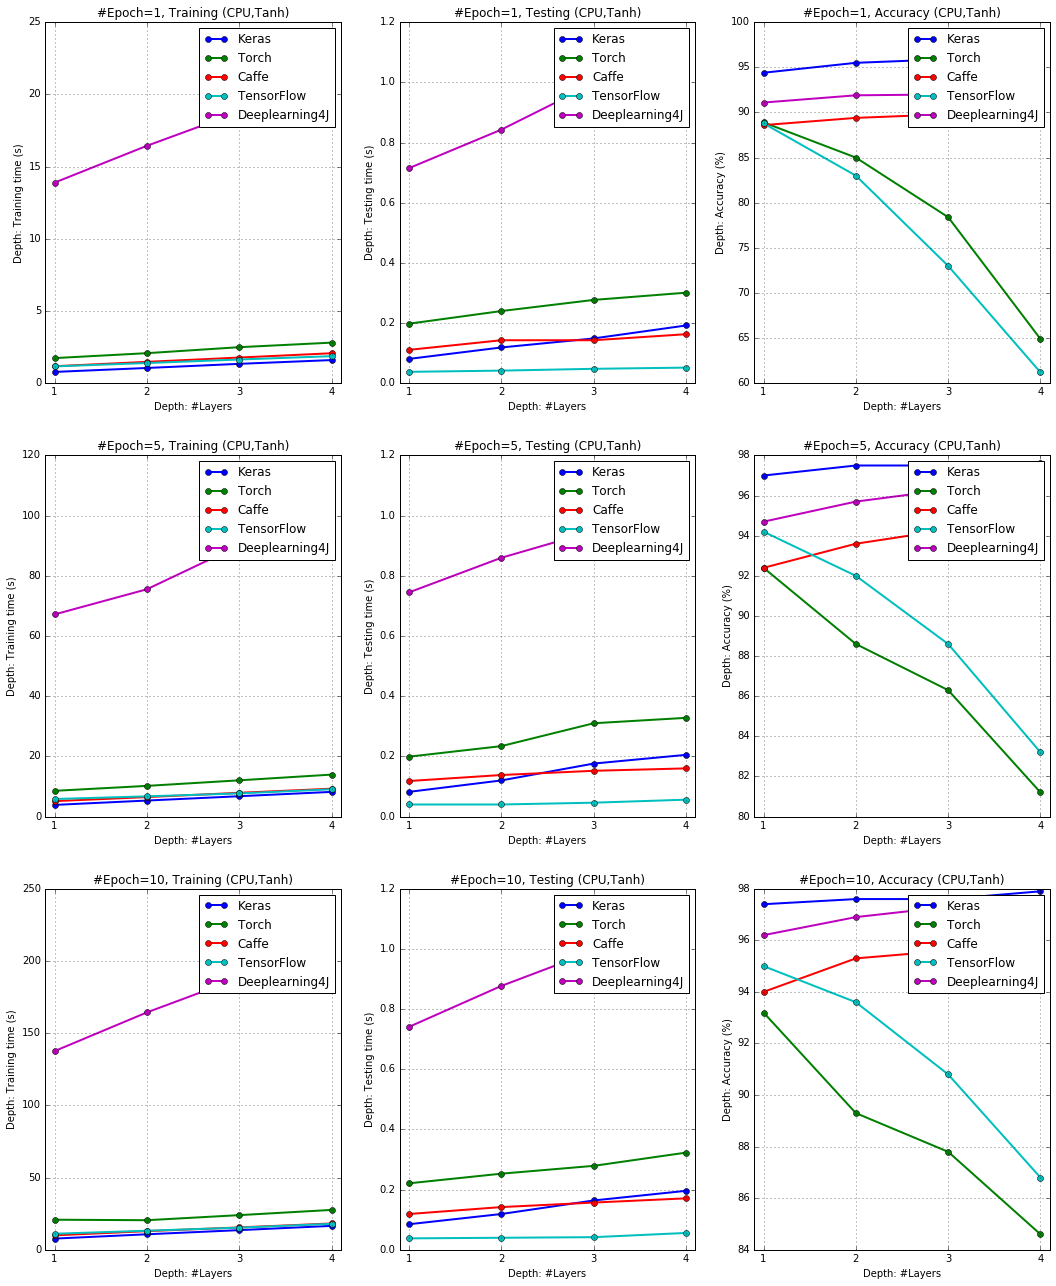

In [6]:
# Time&ACC from numL
# (1) Select nonlinear function, and draw plots
# nonlinFun='Tanh'
# nonlinFun='ReLU'
lstNonLinFun=['ReLU', 'Tanh']
strNetType="Depth"

for nonlinFun in lstNonLinFun:
    numNumEpoch=len(arrNumEpoch)
    plt.figure(figsize=(18,22))
    for ei,numEpoch in enumerate(arrNumEpoch):
        lstLegend=[]
        lstData=[]
        for i,ii in enumerate(arrFrmNames):
            if nonlinFun=='Tanh':
                tmpData=dataTanh_InDepth[ (dataTanh_InDepth['Model']==ii)&(dataTanh_InDepth['numEpoch']==numEpoch)]
                tmpData2=tmpData[['numL','timeTrainMean','timeTestMean','accMean']].as_matrix().T
            else:
                tmpData=dataReLU_InDepth[ (dataReLU_InDepth['Model']==ii)&(dataReLU_InDepth['numEpoch']==numEpoch)]
                tmpData2=tmpData[['numL','timeTrainMean','timeTestMean','accMean']].as_matrix().T
            lstLegend.append(ii)
            lstData.append(tmpData2)
        #
        plt.subplot(numNumEpoch,3,numNumEpoch*ei+1)
        plt.hold(True)
        for tt in lstData:
            plt.plot(tt[0,:], tt[1,:],'-o',linewidth=2.0)
        plt.xticks(tt[0,:].astype(np.int))
        plt.legend(lstLegend)
        plt.hold(False)
        plt.xlim((np.min(tt[0,:])-0.1,np.max(tt[0,:])+0.1))
        plt.xlabel('%s: #Layers' % strNetType)
        plt.ylabel('%s: Training time (s)' % strNetType)
        plt.grid(True)
        plt.title("#Epoch=%d, Training (CPU,%s)" % (numEpoch,nonlinFun))
        #
        plt.subplot(numNumEpoch,3,numNumEpoch*ei+2)
        plt.hold(True)
        for tt in lstData:
            plt.plot(tt[0,:], tt[2,:],'-o',linewidth=2.0)
        plt.xticks(tt[0,:].astype(np.int))
        plt.legend(lstLegend)
        plt.hold(False)
        plt.xlim((np.min(tt[0,:])-0.1,np.max(tt[0,:])+0.1))
        plt.xlabel('%s: #Layers' % strNetType)
        plt.ylabel('%s: Testing time (s)' % strNetType)
        plt.grid(True)
        plt.title("#Epoch=%d, Testing (CPU,%s)" % (numEpoch,nonlinFun))
        #
        plt.subplot(numNumEpoch,3,numNumEpoch*ei+3)
        plt.hold(True)
        for tt in lstData:
            plt.plot(tt[0,:], 100.*tt[3,:],'-o',linewidth=2.0)
        plt.xticks(tt[0,:].astype(np.int))
        plt.legend(lstLegend)
        plt.hold(False)
        plt.xlim((np.min(tt[0,:])-0.1,np.max(tt[0,:])+0.1))
        plt.xlabel('%s: #Layers' % strNetType)
        plt.ylabel('%s: Accuracy (%%)' % strNetType)
        plt.grid(True)
        plt.title("#Epoch=%d, Accuracy (CPU,%s)" % (numEpoch,nonlinFun))
    #
    fimgFigOutTraining='Plot3x3_InDepth_Training_Multi_%s.png' % nonlinFun
    plt.savefig(fimgFigOutTraining)

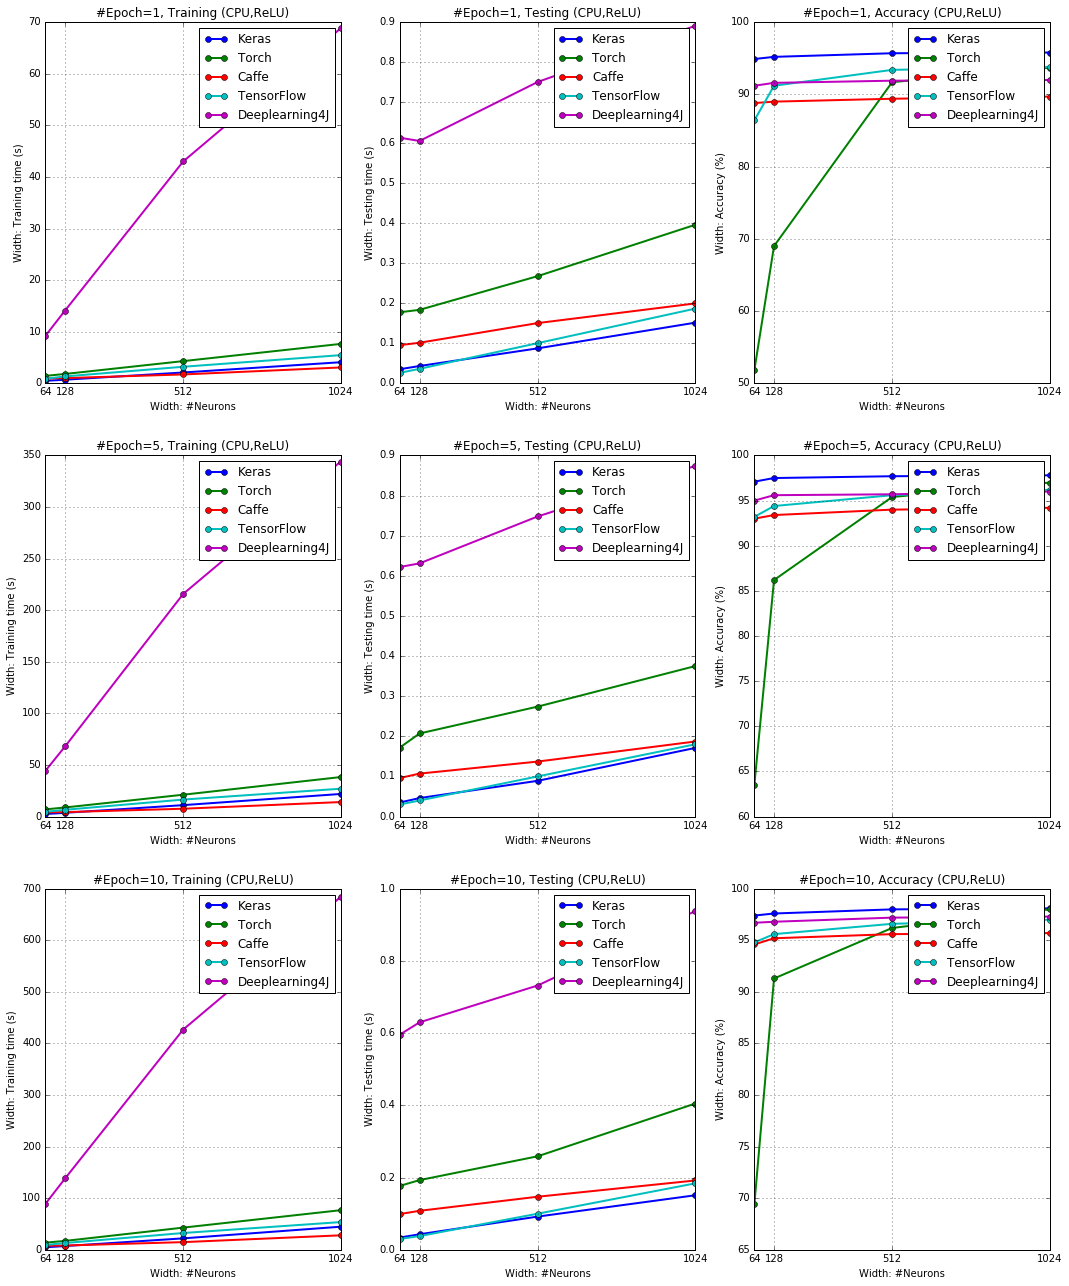

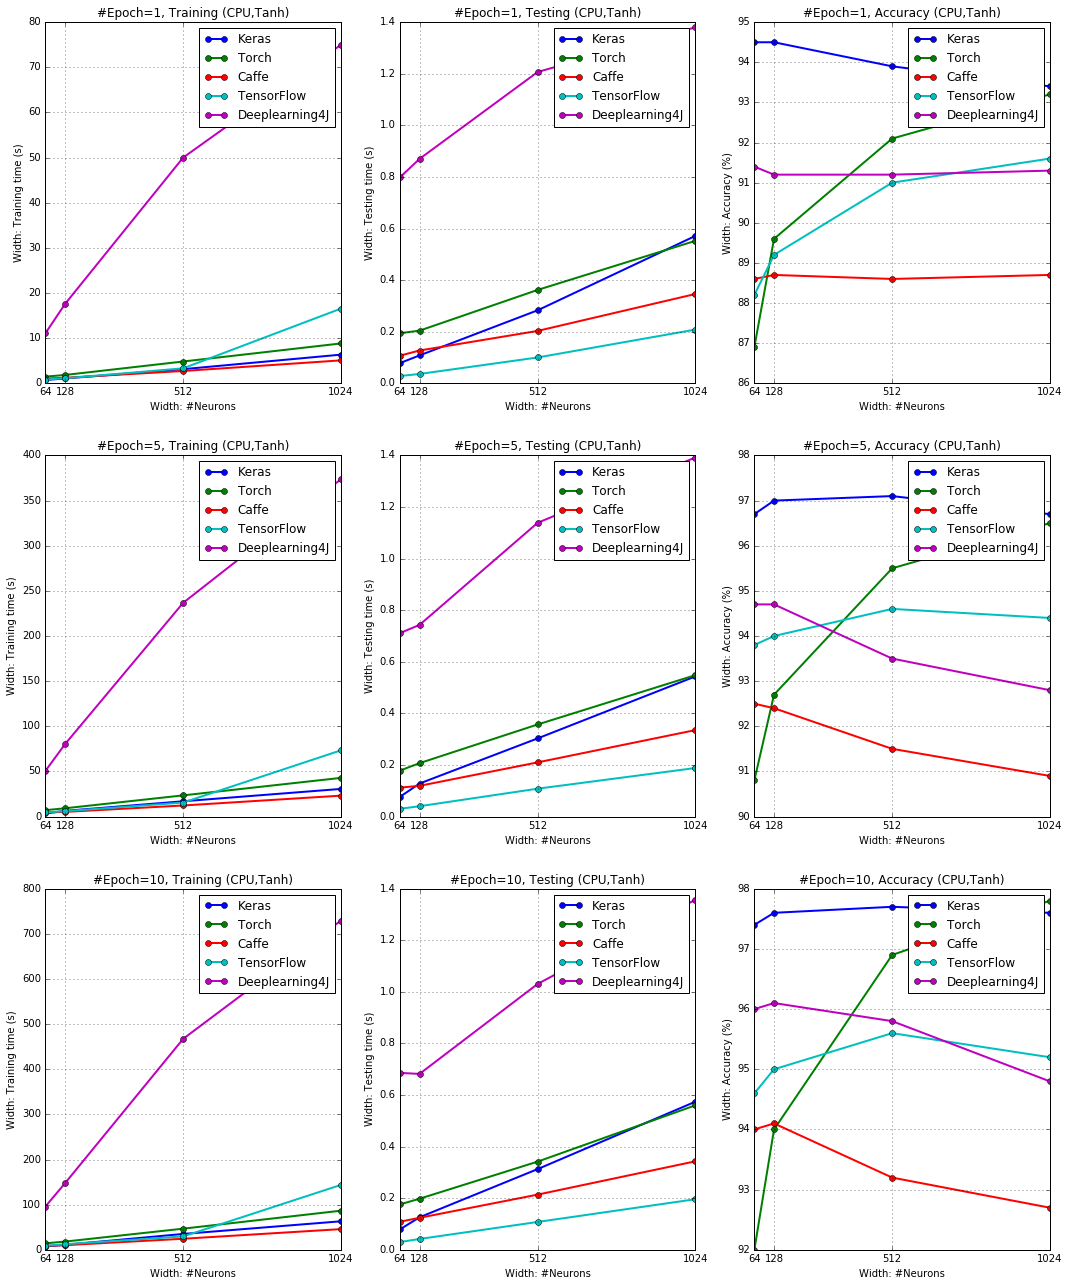

In [7]:
# Time&ACC from numN
# (1) Select nonlinear function, and draw plots
# nonlinFun='Tanh'
# nonlinFun='ReLU'
lstNonLinFun=['ReLU', 'Tanh']
strNetType='Width'

for nonlinFun in lstNonLinFun:
    numNumEpoch=len(arrNumEpoch)
    plt.figure(figsize=(18,22))
    for ei,numEpoch in enumerate(arrNumEpoch):
        lstLegend=[]
        lstData=[]
        for i,ii in enumerate(arrFrmNames):
            if nonlinFun=='Tanh':
                tmpData=dataTanh_InWidth[ (dataTanh_InWidth['Model']==ii)&(dataTanh_InWidth['numEpoch']==numEpoch)]
                tmpData2=tmpData[['numN','timeTrainMean','timeTestMean','accMean']].as_matrix().T
            else:
                tmpData=dataReLU_InWidth[ (dataReLU_InWidth['Model']==ii)&(dataReLU_InWidth['numEpoch']==numEpoch)]
                tmpData2=tmpData[['numN','timeTrainMean','timeTestMean','accMean']].as_matrix().T
            lstLegend.append(ii)
            lstData.append(tmpData2)
        #
        plt.subplot(numNumEpoch,3,numNumEpoch*ei+1)
        plt.hold(True)
        for tt in lstData:
            plt.plot(tt[0,:], tt[1,:],'-o',linewidth=2.0)
        plt.xticks(tt[0,:].astype(np.int))
        plt.legend(lstLegend)
        plt.hold(False)
        plt.xlabel('%s: #Neurons' % strNetType)
        plt.ylabel('%s: Training time (s)' % strNetType)
        plt.xlim((np.min(tt[0,:])-0.1,np.max(tt[0,:])+0.1))
        plt.grid(True)
        plt.title("#Epoch=%d, Training (CPU,%s)" % (numEpoch,nonlinFun))
        #
        plt.subplot(numNumEpoch,3,numNumEpoch*ei+2)
        plt.hold(True)
        for tt in lstData:
            plt.plot(tt[0,:], tt[2,:],'-o',linewidth=2.0)
        plt.xticks(tt[0,:].astype(np.int))
        plt.legend(lstLegend)
        plt.hold(False)
        plt.xlabel('%s: #Neurons' % strNetType)
        plt.ylabel('%s: Testing time (s)' % strNetType)
        plt.xlim((np.min(tt[0,:])-0.1,np.max(tt[0,:])+0.1))
        plt.grid(True)
        plt.title("#Epoch=%d, Testing (CPU,%s)" % (numEpoch,nonlinFun))
        #
        plt.subplot(numNumEpoch,3,numNumEpoch*ei+3)
        plt.hold(True)
        for tt in lstData:
            plt.plot(tt[0,:], 100.*tt[3,:],'-o',linewidth=2.0)
        plt.xticks(tt[0,:].astype(np.int))
        plt.legend(lstLegend)
        plt.hold(False)
        plt.xlabel('%s: #Neurons' % strNetType)
        plt.ylabel('%s: Accuracy (%%)' % strNetType)
        plt.xlim((np.min(tt[0,:])-0.1,np.max(tt[0,:])+0.1))
        plt.grid(True)
        plt.title("#Epoch=%d, Accuracy (CPU,%s)" % (numEpoch,nonlinFun))
    #
    fimgFigOutTraining='Plot3x3_InWidth_Training_Multi_%s.png' % nonlinFun
    plt.savefig(fimgFigOutTraining)